<a href="https://colab.research.google.com/github/gagan3754/Delhivery---Feature-Engineering/blob/main/Delhivery_Project_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/delhivery_data.csv")

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.head(7)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667


In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
df.drop(df[df['source_name'].isnull()].index,inplace=True)

In [ ]:
df.drop(df[df['destination_name'].isnull()].index,inplace=True)

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'],format='mixed')

In [ ]:
df['od_start_time']=pd.to_datetime(df['od_start_time'])

In [ ]:
df['od_end_time']=pd.to_datetime(df['od_end_time'])

In [ ]:
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'],format='mixed')

In [ ]:
df.head(7)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58.000000,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29.000000,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667


In [ ]:
df.dtypes

,0
data,object
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


merging the rows

In [ ]:
df[['trip_uuid','source_center','destination_center']]

,trip_uuid,source_center,destination_center
0,trip-153741093647649320,IND388121AAA,IND388620AAB
1,trip-153741093647649320,IND388121AAA,IND388620AAB
2,trip-153741093647649320,IND388121AAA,IND388620AAB
3,trip-153741093647649320,IND388121AAA,IND388620AAB
4,trip-153741093647649320,IND388121AAA,IND388620AAB
...,...,...,...
144862,trip-153746066843555182,IND131028AAB,IND000000ACB
144863,trip-153746066843555182,IND131028AAB,IND000000ACB
144864,trip-153746066843555182,IND131028AAB,IND000000ACB
144865,trip-153746066843555182,IND131028AAB,IND000000ACB


In [ ]:
df['segment_key']=df.apply(lambda x: "#".join([x['trip_uuid'],x['source_center'],x['destination_center']]),axis=1)

In [ ]:
df['segment_key']

,segment_key
0,trip-153741093647649320#IND388121AAA#IND388620AAB
1,trip-153741093647649320#IND388121AAA#IND388620AAB
2,trip-153741093647649320#IND388121AAA#IND388620AAB
3,trip-153741093647649320#IND388121AAA#IND388620AAB
4,trip-153741093647649320#IND388121AAA#IND388620AAB
...,...
144862,trip-153746066843555182#IND131028AAB#IND000000ACB
144863,trip-153746066843555182#IND131028AAB#IND000000ACB
144864,trip-153746066843555182#IND131028AAB#IND000000ACB
144865,trip-153746066843555182#IND131028AAB#IND000000ACB


In [ ]:
df.head(7)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320#IND388121AAA#IND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320#IND388121AAA#IND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320#IND388121AAA#IND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320#IND388121AAA#IND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320#IND388121AAA#IND388620AAB
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320#IND388620AAB#IND388320AAA
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,trip-153741093647649320#IND388620AAB#IND388320AAA


In [ ]:
df['segment_actual_time_cumsum']=df.groupby('segment_key')['segment_actual_time'].transform(lambda x:x.cumsum())

In [ ]:
df['segment_osrm_time_cum']=df.groupby('segment_key')['segment_osrm_time'].transform(lambda x:x.cumsum())

In [ ]:
df['segment_osrm_distance_cum']=df.groupby('segment_key')['segment_osrm_distance'].transform(lambda x:x.cumsum())

In [ ]:
df.head(7)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cum,segment_osrm_distance_cum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320#IND388121AAA#IND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320#IND388121AAA#IND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320#IND388121AAA#IND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320#IND388121AAA#IND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320#IND388121AAA#IND388620AAB,67.0,44.0,49.4772
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320#IND388620AAB#IND388320AAA,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,21.2890,2.588235,28.0,6.0,9.1719,4.666667,trip-153741093647649320#IND388620AAB#IND388320AAA,43.0,17.0,21.2890


In [ ]:
df['segment_actual_time_sum']=df.groupby('segment_key')['segment_actual_time_cumsum'].transform(lambda x:x.iloc[-1])

In [ ]:
df['segment_osrm_time_sum']=df.groupby('segment_key')['segment_osrm_time_cum'].transform(lambda x:x.iloc[-1])

In [ ]:
df['segment_osrm_distance_sum']=df.groupby('segment_key')['segment_osrm_distance_cum'].transform(lambda x:x.iloc[-1])

In [ ]:
df.head(7)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cum,segment_osrm_distance_cum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,trip-153741093647649320#IND388121AAA#IND388620AAB,14.0,11.0,11.9653,67.0,44.0,49.4772
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,1.111111,trip-153741093647649320#IND388121AAA#IND388620AAB,24.0,20.0,21.7243,67.0,44.0,49.4772
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,2.285714,trip-153741093647649320#IND388121AAA#IND388620AAB,40.0,27.0,32.5395,67.0,44.0,49.4772
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,12.0,13.0224,1.750000,trip-153741093647649320#IND388121AAA#IND388620AAB,61.0,39.0,45.5619,67.0,44.0,49.4772
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,5.0,3.9153,1.200000,trip-153741093647649320#IND388121AAA#IND388620AAB,67.0,44.0,49.4772,67.0,44.0,49.4772
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,11.0,12.1171,1.363636,trip-153741093647649320#IND388620AAB#IND388320AAA,15.0,11.0,12.1171,100.0,44.0,53.2334
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,6.0,9.1719,4.666667,trip-153741093647649320#IND388620AAB#IND388320AAA,43.0,17.0,21.2890,100.0,44.0,53.2334


In [ ]:
df=df.sort_values(by=['segment_key','od_end_time'])

In [ ]:
df.head(20)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cum,segment_osrm_distance_cum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,33.0,38.0620,1.515152,trip-153671041653548748#IND209304AAA#IND000000ACB,50.0,33.0,38.0620,728.0,534.0,670.6205
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,8.0,10.9921,1.125000,trip-153671041653548748#IND209304AAA#IND000000ACB,59.0,41.0,49.0541,728.0,534.0,670.6205
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,22.0,30.6308,1.545455,trip-153671041653548748#IND209304AAA#IND000000ACB,93.0,63.0,79.6849,728.0,534.0,670.6205
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,17.0,25.0959,1.470588,trip-153671041653548748#IND209304AAA#IND000000ACB,118.0,80.0,104.7808,728.0,534.0,670.6205
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,14.0,21.0389,1.428571,trip-153671041653548748#IND209304AAA#IND000000ACB,138.0,94.0,125.8197,728.0,534.0,670.6205
125007,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,81.0,79.9645,0.469136,trip-153671041653548748#IND209304AAA#IND000000ACB,176.0,175.0,205.7842,728.0,534.0,670.6205
125008,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,78.0,101.3602,0.525641,trip-153671041653548748#IND209304AAA#IND000000ACB,217.0,253.0,307.1444,728.0,534.0,670.6205
125009,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,28.0,40.8743,1.785714,trip-153671041653548748#IND209304AAA#IND000000ACB,267.0,281.0,348.0187,728.0,534.0,670.6205
125010,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,19.0,27.0127,2.947368,trip-153671041653548748#IND209304AAA#IND000000ACB,323.0,300.0,375.0314,728.0,534.0,670.6205
125011,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,16.0,23.6588,1.750000,trip-153671041653548748#IND209304AAA#IND000000ACB,351.0,316.0,398.6902,728.0,534.0,670.6205


3.Feature Engineering

Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour.

In [ ]:
df['od_time_diff_hour']=(df['od_end_time']-df['od_start_time'])/pd.Timedelta(hours=1)

In [ ]:
df['od_time_diff_hour']

,od_time_diff_hour
125002,21.010074
125003,21.010074
125004,21.010074
125005,21.010074
125006,21.010074
...,...
86464,0.736240
11572,4.791233
11573,4.791233
11570,1.115559


Destination Name: Split and extract features out of destination. City-place
(State)

Source Name: Split and extract features out of destination. City-place
(State)

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_cumsum,segment_osrm_time_cum,segment_osrm_distance_cum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,38.0620,1.515152,trip-153671041653548748#IND209304AAA#IND000000ACB,50.0,33.0,38.0620,728.0,534.0,670.6205,21.010074
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,10.9921,1.125000,trip-153671041653548748#IND209304AAA#IND000000ACB,59.0,41.0,49.0541,728.0,534.0,670.6205,21.010074
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,30.6308,1.545455,trip-153671041653548748#IND209304AAA#IND000000ACB,93.0,63.0,79.6849,728.0,534.0,670.6205,21.010074
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,25.0959,1.470588,trip-153671041653548748#IND209304AAA#IND000000ACB,118.0,80.0,104.7808,728.0,534.0,670.6205,21.010074
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.0389,1.428571,trip-153671041653548748#IND209304AAA#IND000000ACB,138.0,94.0,125.8197,728.0,534.0,670.6205,21.010074


In [ ]:
df['source_name']=df['source_name'].astype('str')
df['destination_name']=df['destination_name'].astype('str')

In [ ]:
def get_state(x):
  l=x.split('(')
  if len(l)==1:
    return l[0]
  else:
    return l[1].replace(')','')

In [ ]:
df['source_state']=df['source_name'].apply(get_state)

In [ ]:
def get_city(x):
  l=x.split('_')
  return l[0]

In [ ]:
df['source_city']=df['source_name'].apply(get_city)

In [ ]:
def get_place(x):
  l=x.split()[0].split('_',1)
  if len(l)==1:
    return 'Unknown place'
  else:
    return l[1]

In [ ]:
df['source_place']=df['source_name'].apply(get_place)

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time_cumsum,segment_osrm_time_cum,segment_osrm_distance_cum,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_state,source_city,source_place
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,50.0,33.0,38.0620,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,59.0,41.0,49.0541,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,93.0,63.0,79.6849,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,118.0,80.0,104.7808,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,138.0,94.0,125.8197,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6


In [ ]:
df['destination_state']=df['destination_name'].apply(get_state)

In [ ]:
df['destination_city']=df['destination_name'].apply(get_city)

In [ ]:
df['destination_place']=df['destination_name'].apply(get_place)

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour,source_state,source_city,source_place,destination_state,destination_city,destination_place
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,728.0,534.0,670.6205,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB


Trip_creation_time: Extract features like month, year, day.

In [ ]:
df['Month']=df['trip_creation_time'].dt.month

In [ ]:
df['Year']=df['trip_creation_time'].dt.year

In [ ]:
df['Day']=df['trip_creation_time'].dt.day

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,od_time_diff_hour,source_state,source_city,source_place,destination_state,destination_city,destination_place,Month,Year,Day
125002,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125003,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125004,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125005,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125006,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12


In-depth analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 125002 to 11571
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime

In [ ]:
df1=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby('trip_uuid').agg(trip_actual_time_sum=('actual_time','sum')).reset_index()

In [ ]:
df1

,trip_uuid,trip_actual_time_sum
0,trip-153671041653548748,1562.0
1,trip-153671042288605164,143.0
2,trip-153671043369099517,3347.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,341.0
...,...,...
14782,trip-153861095625827784,83.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,282.0
14785,trip-153861115439069069,264.0


In [ ]:
df2=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby('trip_uuid').agg(trip_osrm_time_sum=('osrm_time','sum')).reset_index()

In [ ]:
df2

,trip_uuid,trip_osrm_time_sum
0,trip-153671041653548748,717.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1740.0
3,trip-153671046011330457,15.0
4,trip-153671052974046625,117.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,12.0
14784,trip-153861106442901555,48.0
14785,trip-153861115439069069,179.0


In [ ]:
df3=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby('trip_uuid').agg(trip_osrm_distance_sum=('osrm_distance','sum')).reset_index()

In [ ]:
df3

,trip_uuid,trip_osrm_distance_sum
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2354.0665
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14782,trip-153861095625827784,73.4630
14783,trip-153861104386292051,16.0882
14784,trip-153861106442901555,58.9037
14785,trip-153861115439069069,171.1103


In [ ]:
df4=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby('trip_uuid').agg(trip_segment_actual_time_sum=('segment_actual_time_sum','sum')).reset_index()

In [ ]:
df4

,trip_uuid,trip_segment_actual_time_sum
0,trip-153671041653548748,1548.0
1,trip-153671042288605164,141.0
2,trip-153671043369099517,3308.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,340.0
...,...,...
14782,trip-153861095625827784,82.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,281.0
14785,trip-153861115439069069,258.0


In [ ]:
df5=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby('trip_uuid').agg(trip_segment_osrm_time_sum=('segment_osrm_time_sum','sum')).reset_index()

In [ ]:
df5

,trip_uuid,trip_segment_osrm_time_sum
0,trip-153671041653548748,1008.0
1,trip-153671042288605164,65.0
2,trip-153671043369099517,1941.0
3,trip-153671046011330457,16.0
4,trip-153671052974046625,115.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,11.0
14784,trip-153861106442901555,88.0
14785,trip-153861115439069069,221.0


In [ ]:
df6=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby('trip_uuid').agg(trip_segment_osrm_distance_sum=('segment_osrm_distance_sum','sum')).reset_index()

In [ ]:
df6

,trip_uuid,trip_segment_osrm_distance_sum
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919
...,...,...
14782,trip-153861095625827784,64.8551
14783,trip-153861104386292051,16.0883
14784,trip-153861106442901555,104.8866
14785,trip-153861115439069069,223.5324


In [ ]:
df2=df1.merge(df2,on='trip_uuid',how='inner')

In [ ]:
df3=df2.merge(df3,on='trip_uuid',how='inner')

In [ ]:
df4=df3.merge(df4,on='trip_uuid',how='inner')

In [ ]:
df5=df4.merge(df5,on='trip_uuid',how='inner')

In [ ]:
trip_aggregated_df=df5.merge(df6,on='trip_uuid',how='inner')

In [ ]:
df7=df.groupby(['trip_uuid','segment_key']).nth(-1).groupby('trip_uuid').agg(trip_total_time_in_hrs=('od_time_diff_hour','sum')).reset_index()

In [ ]:
trip_aggregated_df=trip_aggregated_df.merge(df7,on='trip_uuid',how='inner')

In [ ]:
trip_aggregated_df.head(7)

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484
5,trip-153671055416136166,61.0,23.0,28.0647,60.0,23.0,28.0647,3.174797
6,trip-153671066201138152,24.0,13.0,12.0184,24.0,13.0,12.0184,1.633427


In [ ]:
trip_aggregated_df.describe()

,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,356.306012,160.990938,203.887411,353.059174,180.511598,222.705466,8.838066
std,561.517936,271.459495,370.565564,556.365911,314.679279,416.846279,10.972695
min,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,0.391024
25%,67.000000,29.000000,30.756900,66.000000,30.000000,32.578850,2.494975
50%,148.000000,60.000000,65.302800,147.000000,65.000000,69.784200,4.661846
75%,367.000000,168.000000,206.644200,364.000000,184.000000,216.560600,10.558962
max,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,131.642533


Outlier Detection & Treatment

a. Find any existing outliers in numerical features.

b. Visualize the outlier values using Boxplot.

c. Handle the outliers using the IQR method.

<Axes: ylabel='trip_osrm_distance_sum'>

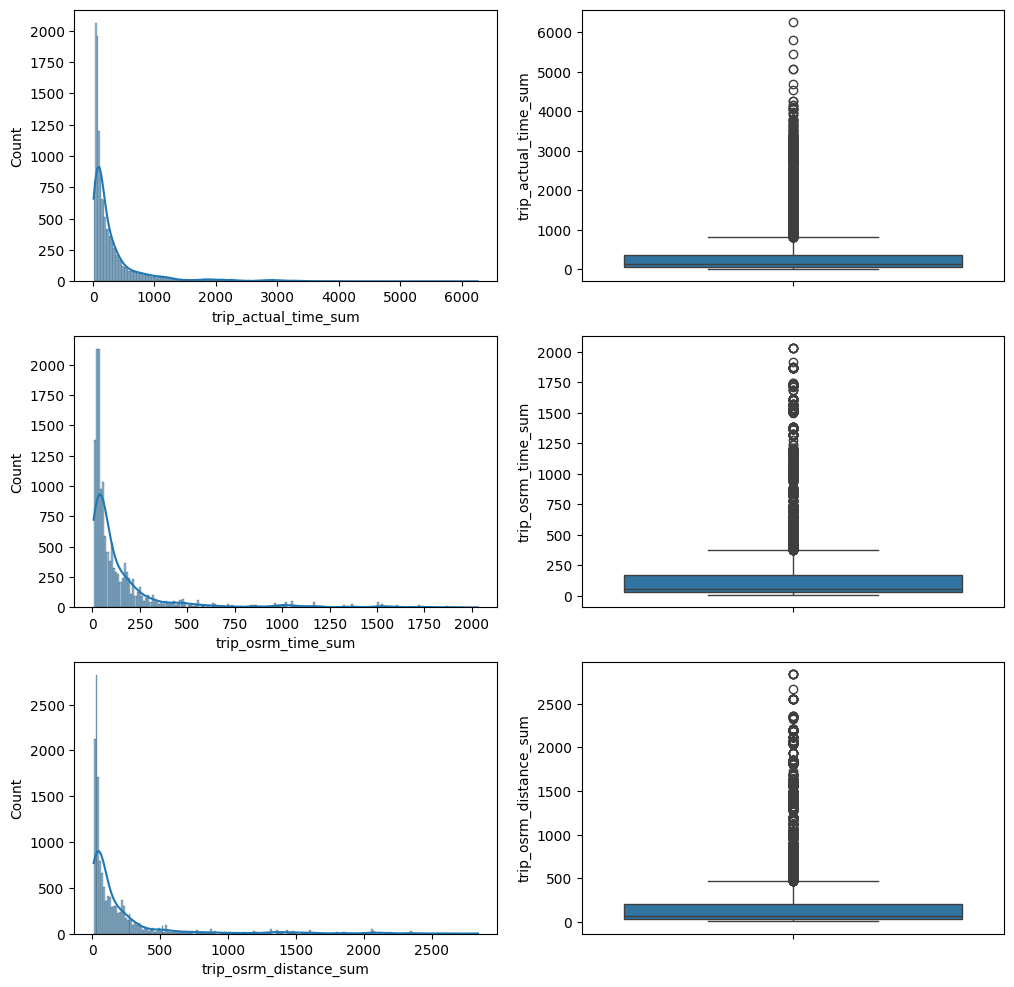

In [ ]:
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,12))
sns.histplot(trip_aggregated_df['trip_actual_time_sum'],ax=axis[0,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_actual_time_sum'],ax=axis[0,1])

sns.histplot(trip_aggregated_df['trip_osrm_time_sum'],ax=axis[1,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_osrm_time_sum'],ax=axis[1,1])

sns.histplot(trip_aggregated_df['trip_osrm_distance_sum'],ax=axis[2,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_osrm_distance_sum'],ax=axis[2,1])

In [ ]:
trip_aggregated_df.head()

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484


<Axes: ylabel='trip_segment_osrm_distance_sum'>

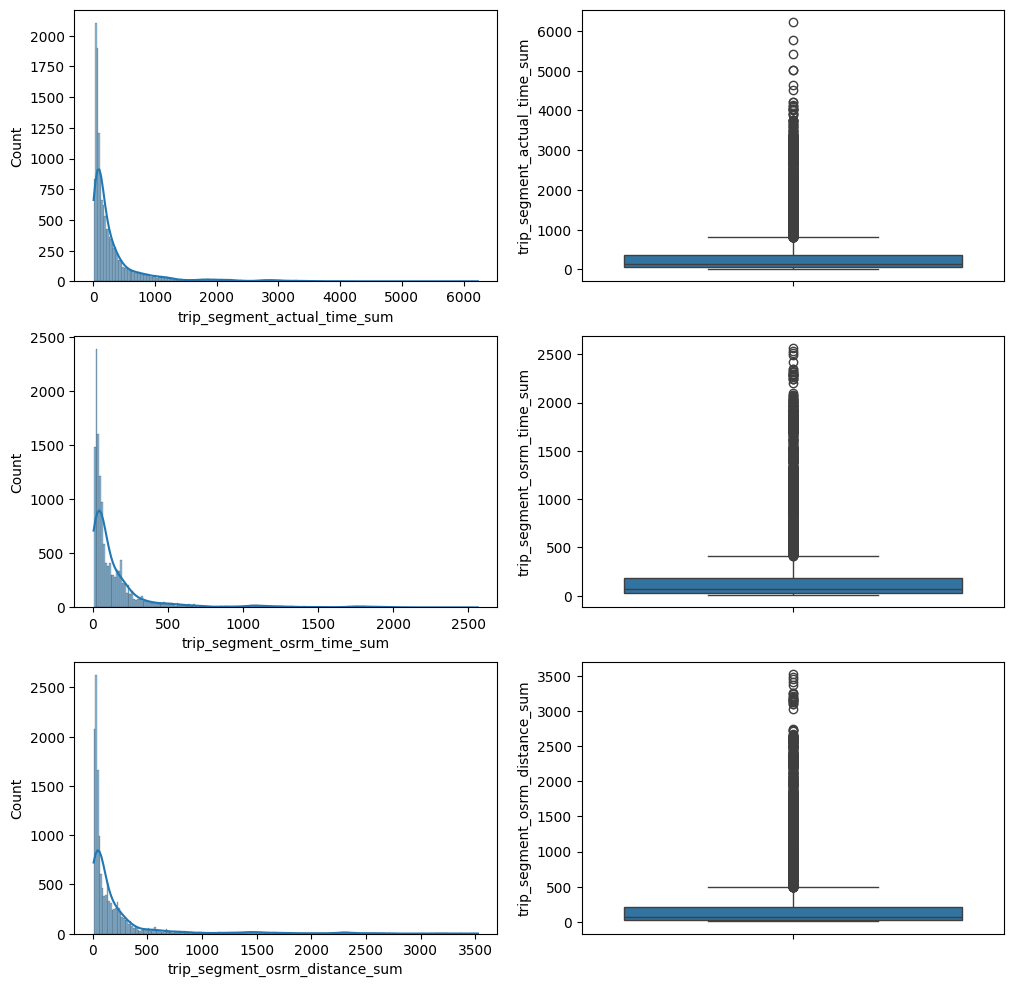

In [ ]:
figure,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,12))

sns.histplot(trip_aggregated_df['trip_segment_actual_time_sum'],ax=axis[0,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_segment_actual_time_sum'],ax=axis[0,1])

sns.histplot(trip_aggregated_df['trip_segment_osrm_time_sum'],ax=axis[1,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_segment_osrm_time_sum'],ax=axis[1,1])

sns.histplot(trip_aggregated_df['trip_segment_osrm_distance_sum'],ax=axis[2,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_segment_osrm_distance_sum'],ax=axis[2,1])

<Axes: ylabel='trip_total_time_in_hrs'>

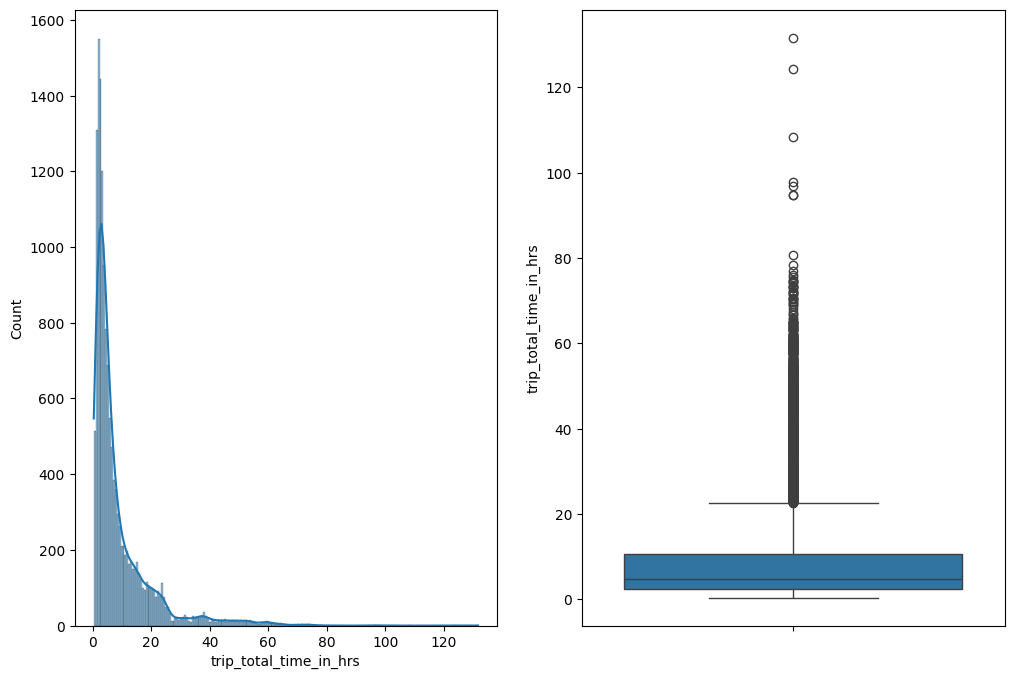

In [ ]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.histplot(trip_aggregated_df['trip_total_time_in_hrs'],ax=axis[0],kde=True)
sns.boxplot(trip_aggregated_df['trip_total_time_in_hrs'],ax=axis[1])

<Axes: xlabel='trip_actual_time_sum', ylabel='Count'>

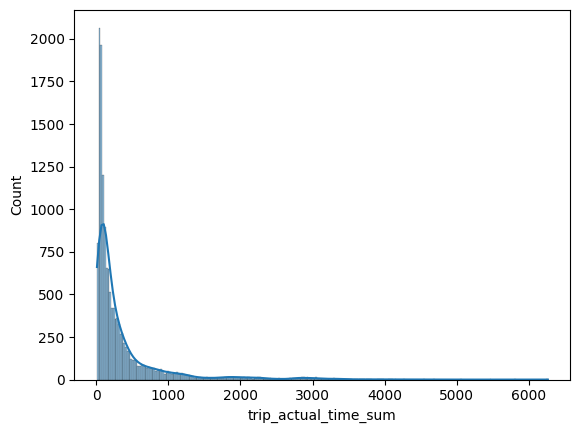

In [ ]:
sns.histplot(trip_aggregated_df['trip_actual_time_sum'],kde=True)

<Axes: ylabel='trip_actual_time_sum'>

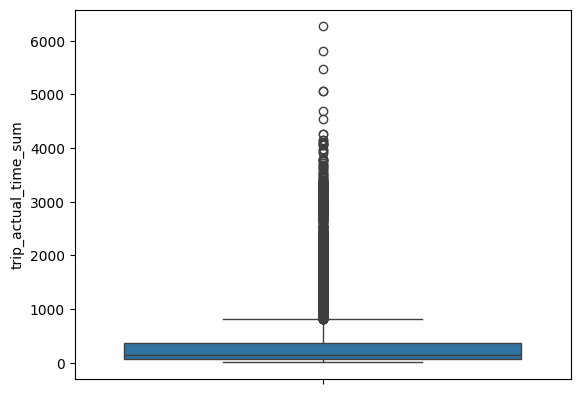

In [ ]:
sns.boxplot(trip_aggregated_df['trip_actual_time_sum'])

<Axes: >

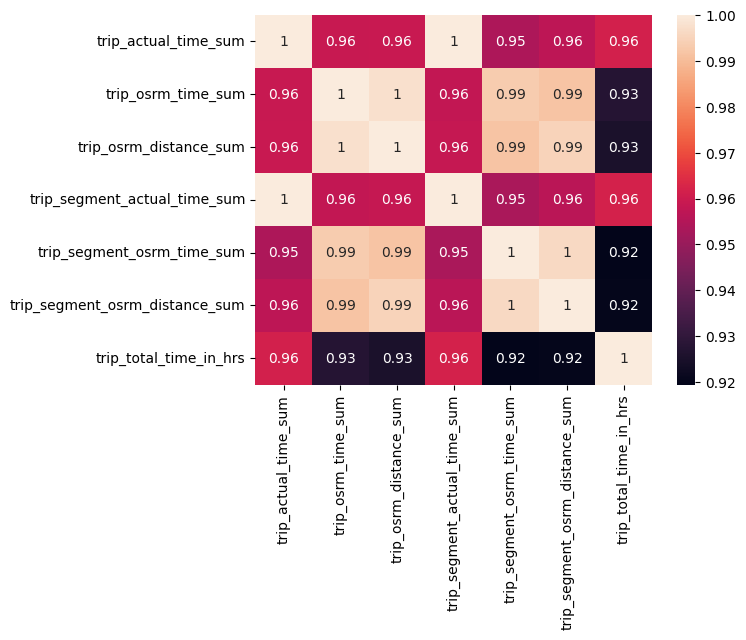

In [ ]:
sns.heatmap(trip_aggregated_df.select_dtypes(['int','float']).corr(),annot=True)

In [ ]:
#Handling Outliers

In [ ]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,37.668497
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,65.0,84.1894,3.026865
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,65.572709
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,16.0,19.8766,1.674916
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,115.0,146.7919,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.4630,82.0,62.0,64.8551,4.300482
14783,trip-153861104386292051,21.0,12.0,16.0882,21.0,11.0,16.0883,1.009842
14784,trip-153861106442901555,282.0,48.0,58.9037,281.0,88.0,104.8866,7.035331
14785,trip-153861115439069069,264.0,179.0,171.1103,258.0,221.0,223.5324,5.808548


In [ ]:
trip_aggregated_df.columns

Index(['trip_uuid', 'trip_actual_time_sum', 'trip_osrm_time_sum',
       'trip_osrm_distance_sum', 'trip_segment_actual_time_sum',
       'trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum',
       'trip_total_time_in_hrs'],
      dtype='object')

In [ ]:
num=['trip_actual_time_sum', 'trip_osrm_time_sum',
       'trip_osrm_distance_sum', 'trip_segment_actual_time_sum',
       'trip_segment_osrm_time_sum', 'trip_segment_osrm_distance_sum',
       'trip_total_time_in_hrs']

In [ ]:
Q1=trip_aggregated_df[num].quantile(0.25)
Q3=trip_aggregated_df[num].quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
lower_bound=Q1-1.5*IQR

In [ ]:
upper_bound=Q3+1.5*IQR

In [ ]:
trip_aggregated_df[num]=trip_aggregated_df[num].clip(lower=lower_bound,upper=upper_bound,axis=1)

In [ ]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.46300,82.0,62.0,64.855100,4.300482
14783,trip-153861104386292051,21.0,12.0,16.08820,21.0,11.0,16.088300,1.009842
14784,trip-153861106442901555,282.0,48.0,58.90370,281.0,88.0,104.886600,7.035331
14785,trip-153861115439069069,264.0,179.0,171.11030,258.0,221.0,223.532400,5.808548


<Axes: ylabel='trip_osrm_distance_sum'>

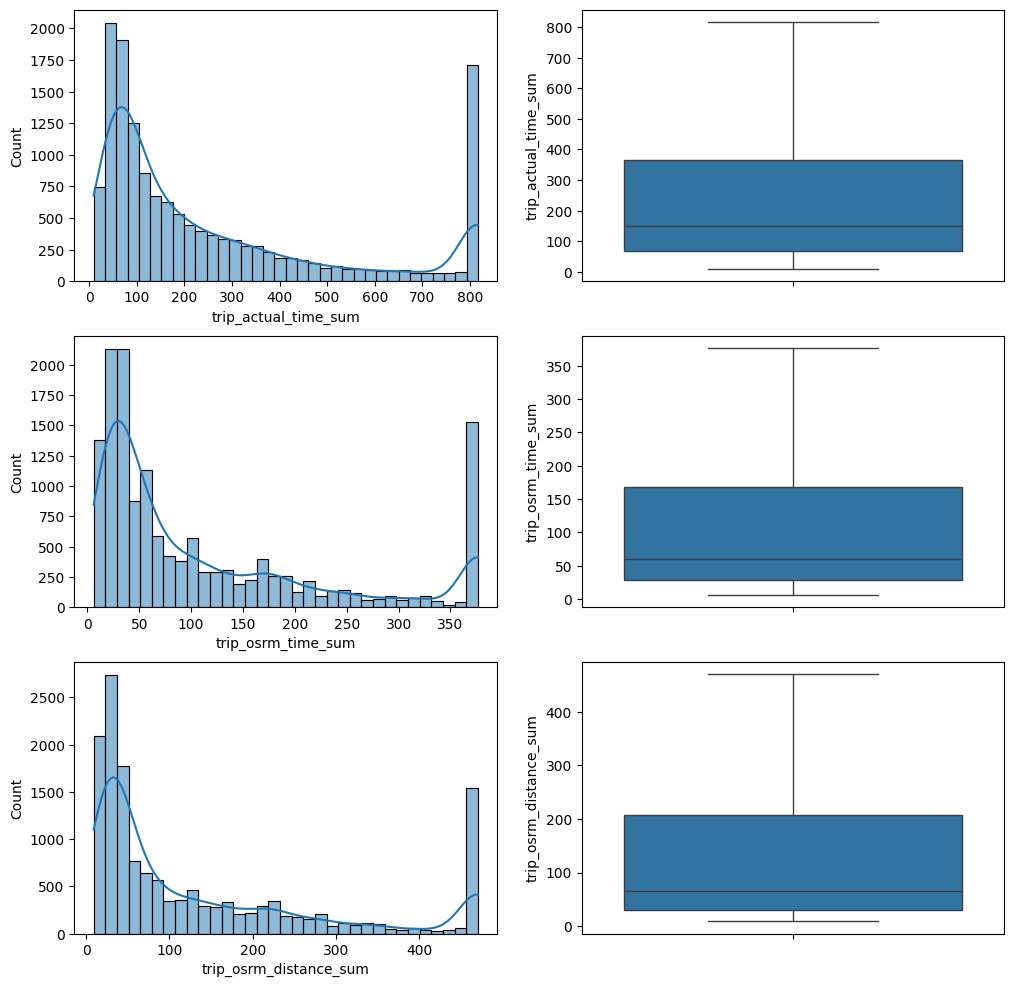

In [ ]:
figure,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,12))

sns.histplot(trip_aggregated_df['trip_actual_time_sum'],ax=axis[0,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_actual_time_sum'],ax=axis[0,1])

sns.histplot(trip_aggregated_df['trip_osrm_time_sum'],ax=axis[1,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_osrm_time_sum'],ax=axis[1,1])

sns.histplot(trip_aggregated_df['trip_osrm_distance_sum'],ax=axis[2,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_osrm_distance_sum'],ax=axis[2,1])

<Axes: ylabel='trip_segment_osrm_distance_sum'>

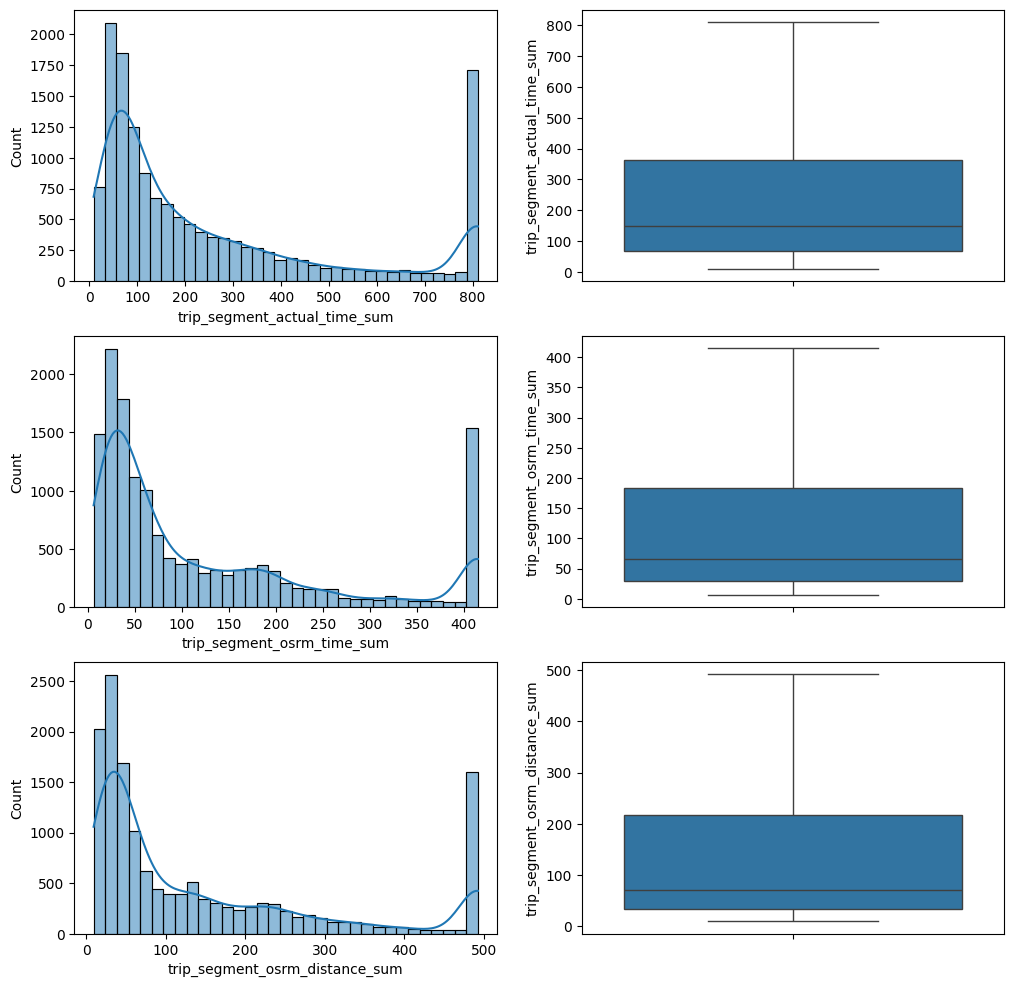

In [ ]:
figure,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,12))

sns.histplot(trip_aggregated_df['trip_segment_actual_time_sum'],ax=axis[0,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_segment_actual_time_sum'],ax=axis[0,1])

sns.histplot(trip_aggregated_df['trip_segment_osrm_time_sum'],ax=axis[1,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_segment_osrm_time_sum'],ax=axis[1,1])

sns.histplot(trip_aggregated_df['trip_segment_osrm_distance_sum'],ax=axis[2,0],kde=True)
sns.boxplot(trip_aggregated_df['trip_segment_osrm_distance_sum'],ax=axis[2,1])

<Axes: ylabel='trip_total_time_in_hrs'>

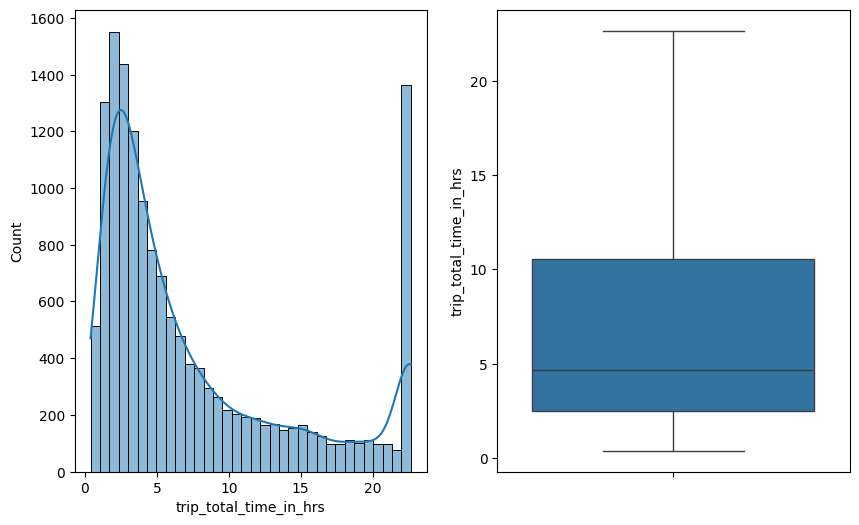

In [ ]:
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
sns.histplot(trip_aggregated_df['trip_total_time_in_hrs'],kde=True,ax=axis[0])
sns.boxplot(trip_aggregated_df['trip_total_time_in_hrs'],ax=axis[1])

<Axes: xlabel='trip_actual_time_sum', ylabel='Count'>

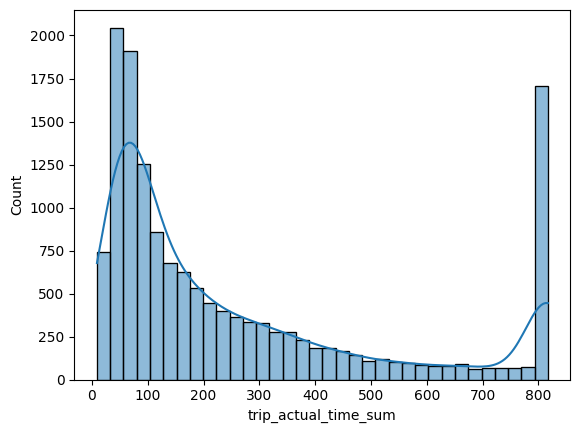

In [ ]:
sns.histplot(trip_aggregated_df['trip_actual_time_sum'],kde=True)

<Axes: ylabel='trip_actual_time_sum'>

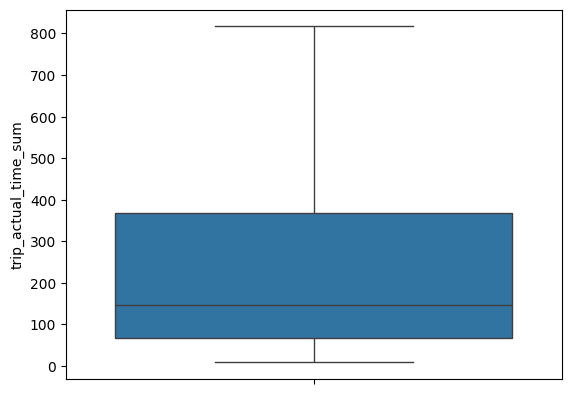

In [ ]:
sns.boxplot(trip_aggregated_df['trip_actual_time_sum'])

Outliers have been clipped

Perform one-hot encoding on categorical features.

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_cumsum', 'segment_osrm_time_cum',
       'segment_osrm_distance_cum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place', 'Month',
       'Year', 'Day'],
      dtype='object')

In [ ]:
df['data'].value_counts()

,count
data,
training,104632
test,39684


In [ ]:
df['route_type'].value_counts()

,count
route_type,
FTL,99132
Carting,45184


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['data']=LabelEncoder().fit_transform(df['data'])

In [ ]:
df['route_type']=LabelEncoder().fit_transform(df['route_type'])

In [ ]:
df['data'].value_counts()

,count
data,
1,104632
0,39684


In [ ]:
df['route_type'].value_counts()

,count
route_type,
1,99132
0,45184


Normalize/ Standardize the numerical features using MinMaxScaler or
StandardScaler.

In [ ]:
trip_aggregated_df.head()

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484


In [ ]:
from sklearn.preprocessing import StandardScaler

Standardization for numerical columns

In [ ]:
num

['trip_actual_time_sum',
 'trip_osrm_time_sum',
 'trip_osrm_distance_sum',
 'trip_segment_actual_time_sum',
 'trip_segment_osrm_time_sum',
 'trip_segment_osrm_distance_sum',
 'trip_total_time_in_hrs']

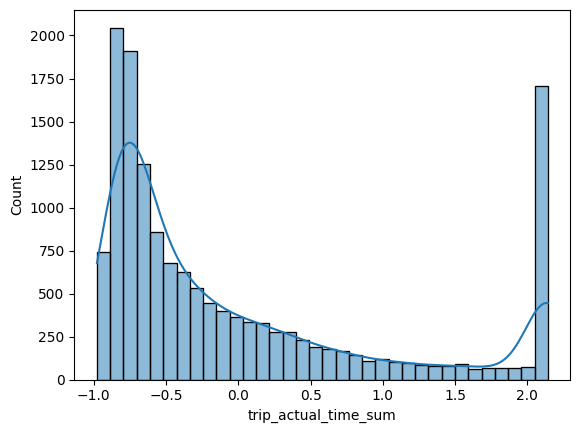

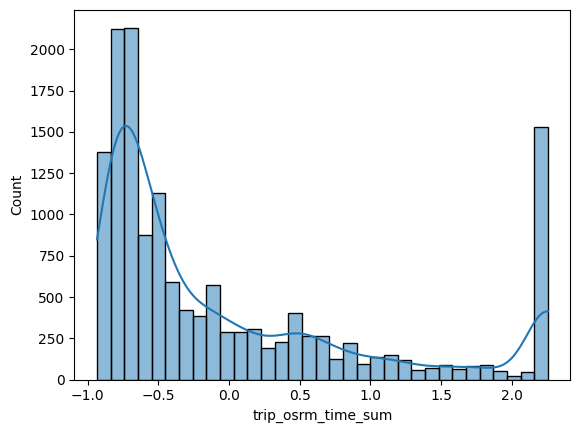

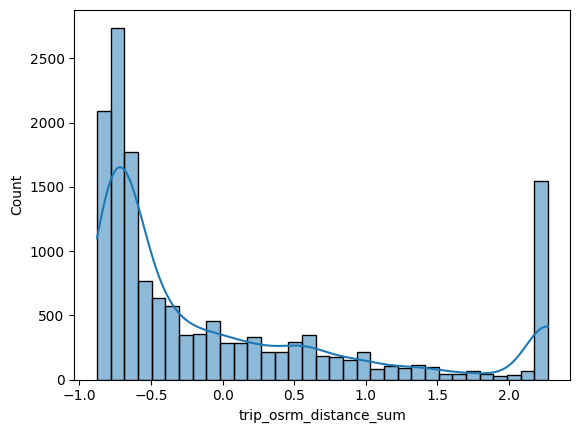

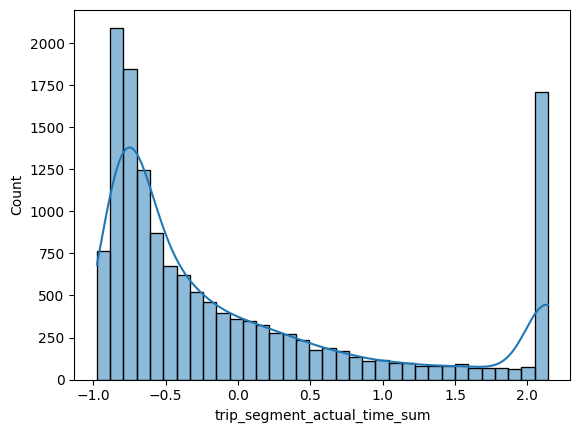

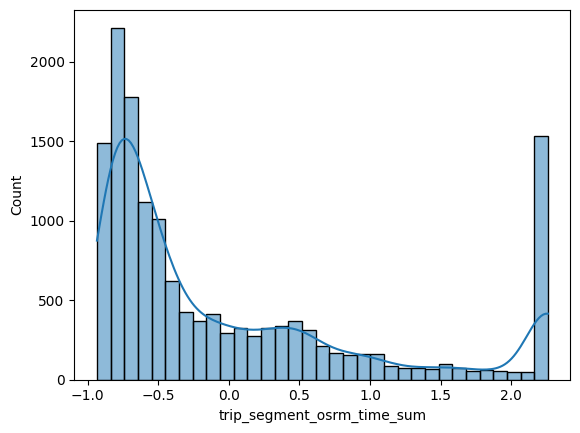

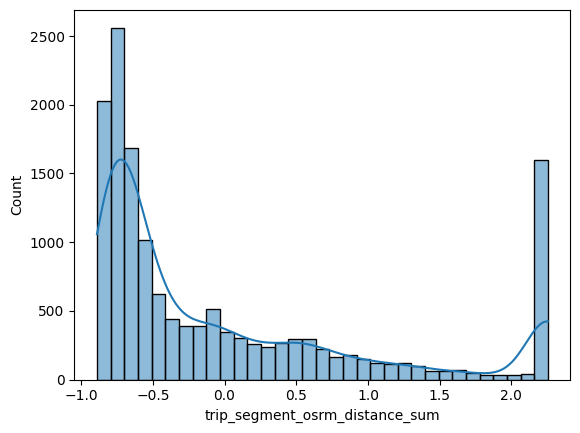

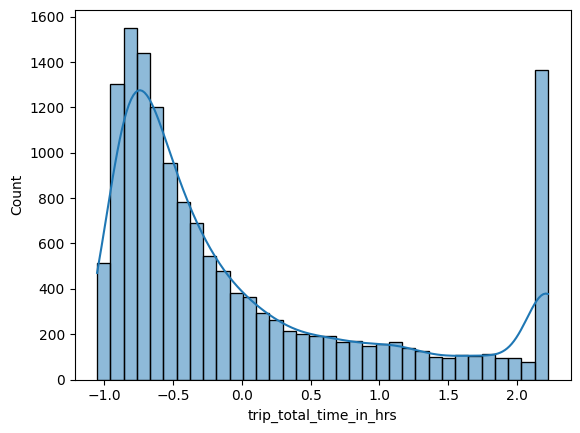

In [ ]:
for i in num:
  s1=StandardScaler().fit_transform(trip_aggregated_df[[i]]).flatten()
  sns.histplot(s1,kde=True)
  plt.xlabel(i)
  plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

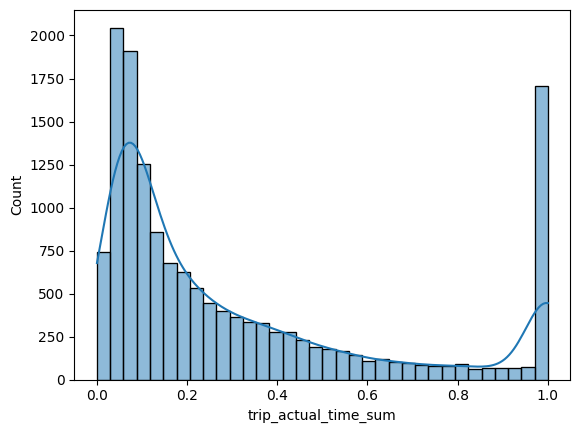

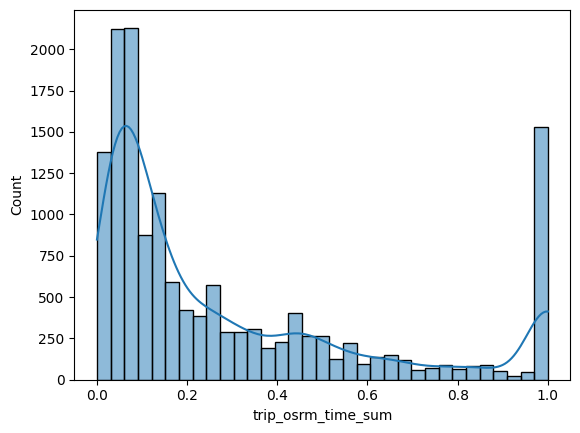

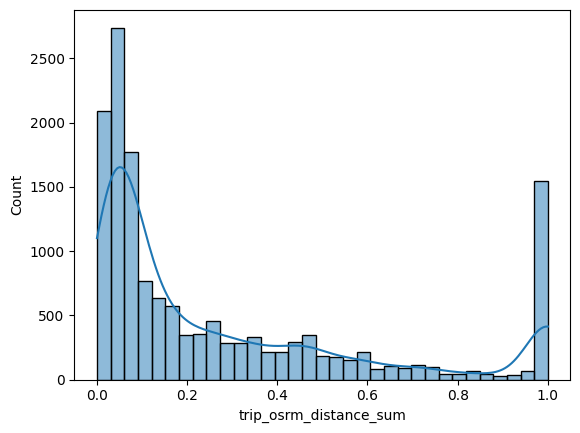

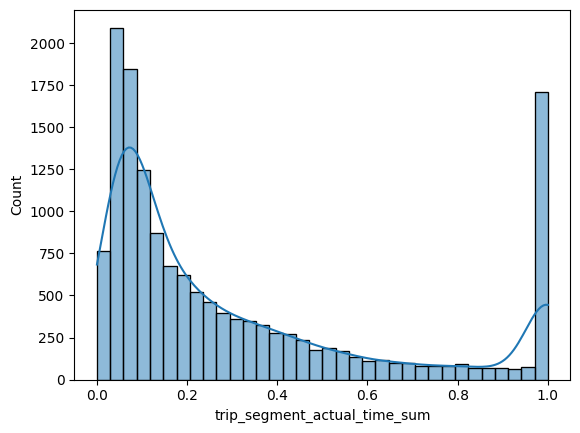

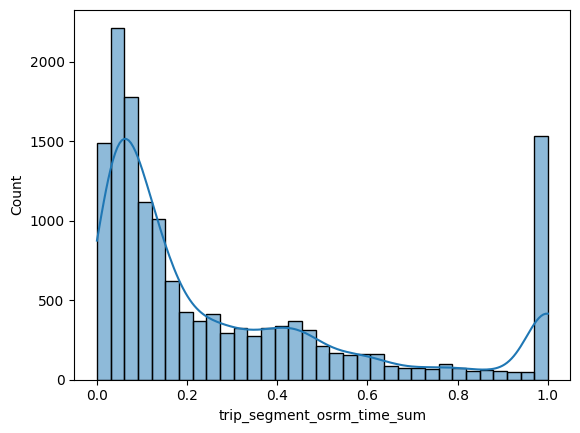

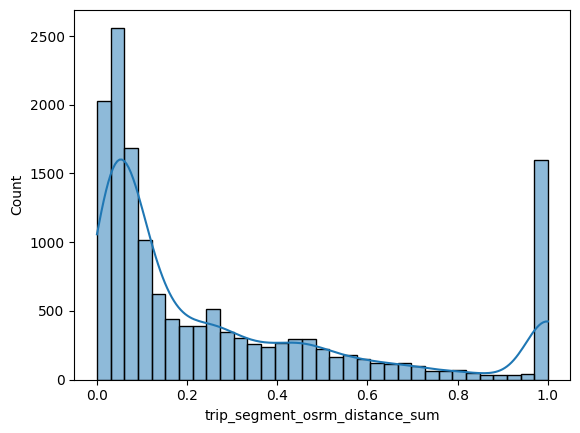

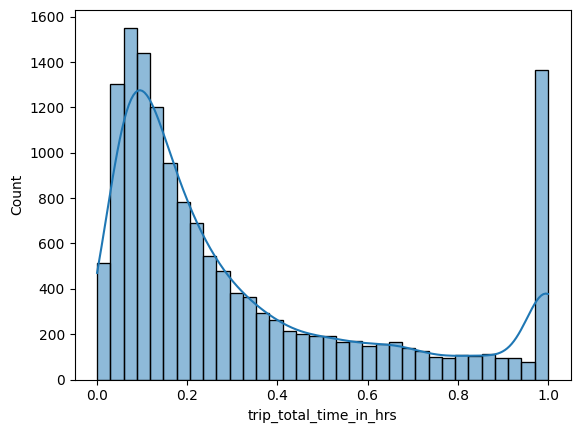

In [ ]:
for i in num:
  s2=MinMaxScaler().fit_transform(trip_aggregated_df[[i]]).flatten()
  sns.histplot(s2,kde=True)
  plt.xlabel(i)
  plt.show()

In [ ]:
trip_aggregated_df

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484
...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,83.0,62.0,73.46300,82.0,62.0,64.855100,4.300482
14783,trip-153861104386292051,21.0,12.0,16.08820,21.0,11.0,16.088300,1.009842
14784,trip-153861106442901555,282.0,48.0,58.90370,281.0,88.0,104.886600,7.035331
14785,trip-153861115439069069,264.0,179.0,171.11030,258.0,221.0,223.532400,5.808548


Hypothesis Testing

a. actual_time aggregated value and OSRM time aggregated value.

b. actual_time aggregated value and segment actual time aggregated
value.

c. OSRM distance aggregated value and segment OSRM distance
aggregated value.

d. OSRM time aggregated value and segment OSRM time aggregated
value.

In [ ]:
trip_aggregated_df.head()

,trip_uuid,trip_actual_time_sum,trip_osrm_time_sum,trip_osrm_distance_sum,trip_segment_actual_time_sum,trip_segment_osrm_time_sum,trip_segment_osrm_distance_sum,trip_total_time_in_hrs
0,trip-153671041653548748,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
1,trip-153671042288605164,143.0,68.0,85.11100,141.0,65.0,84.189400,3.026865
2,trip-153671043369099517,817.0,376.5,470.47515,811.0,415.0,492.533225,22.654942
3,trip-153671046011330457,59.0,15.0,19.68000,59.0,16.0,19.876600,1.674916
4,trip-153671052974046625,341.0,117.0,146.79180,340.0,115.0,146.791900,11.972484


a. actual_time aggregated value and OSRM time aggregated value.

Null Hypothesis H0 : Actual time aggregated value is lesser compared to OSRM time aggregated value

Alternate Hypothesis H1 : Actual time aggregated value is greater than OSRM time aggregated value

In [ ]:
from scipy.stats import ttest_rel

In [ ]:
from statsmodels.graphics.gofplots import qqplot

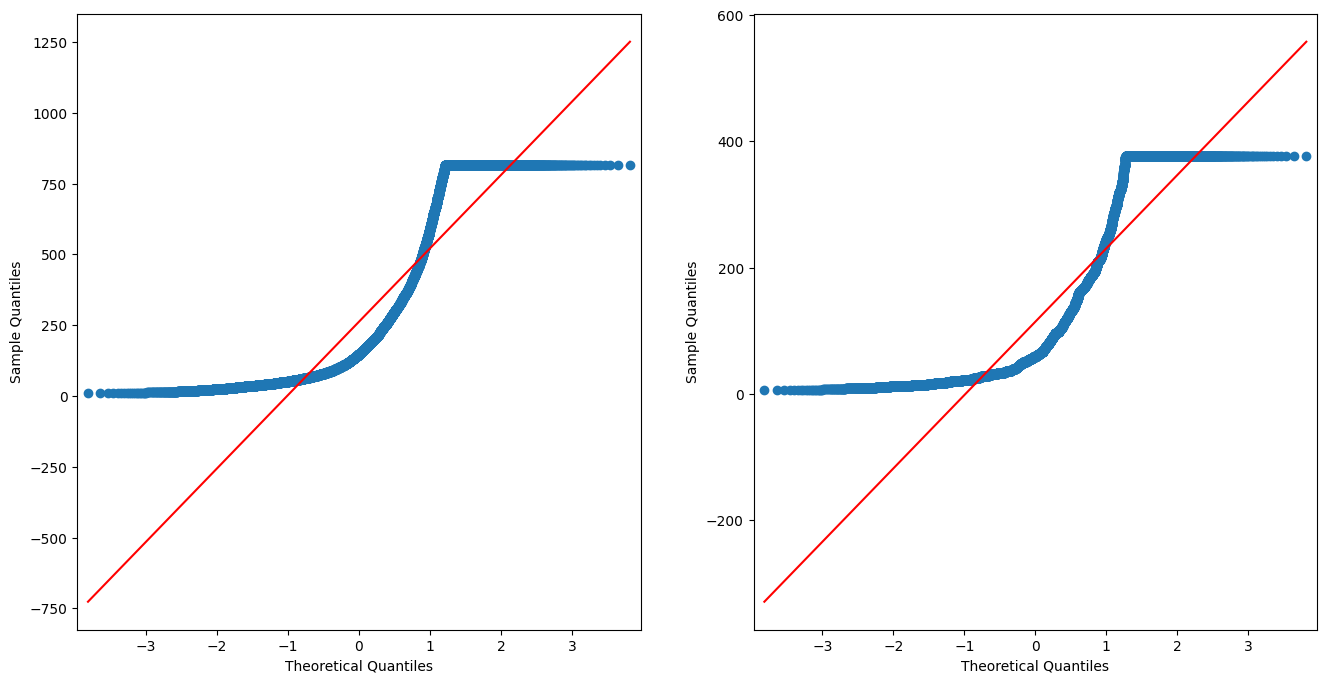

In [ ]:
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
qqplot(trip_aggregated_df['trip_actual_time_sum'],line='s',ax=axis[0])
qqplot(trip_aggregated_df['trip_osrm_time_sum'],line='s',ax=axis[1])
plt.show()

Hence data is not normal we can use wilcoxin , hence n>30 we can use paired t test also

In [ ]:
import scipy.stats as stats

In [ ]:
ttest_rel(trip_aggregated_df['trip_actual_time_sum'],trip_aggregated_df['trip_osrm_time_sum'],alternative='greater')

TtestResult(statistic=112.89026761644506, pvalue=0.0, df=14786)

In [ ]:
stats.wilcoxon(trip_aggregated_df['trip_actual_time_sum'],trip_aggregated_df['trip_osrm_time_sum'],alternative='greater')

WilcoxonResult(statistic=108914306.5, pvalue=0.0)

Hence p_value is 0 for both

In [ ]:
p_value=0.0
alpha=0.05

In [ ]:
if p_value>alpha:
  print('Null Hypothesis')
  print('Actual time aggregated value is lesser compared to OSRM time aggregated value')
else:
  print('Alternate Hypothesis')
  print('Actual time aggregated value is greater than OSRM time aggregated value')

Alternate Hypothesis
Actual time aggregated value is greater than OSRM time aggregated value


In [ ]:
(np.mean(trip_aggregated_df['trip_actual_time_sum']),np.mean(trip_aggregated_df['trip_osrm_time_sum']))

(262.29289240549133, 114.49563806045852)

b. actual_time aggregated value and segment actual time aggregated
value.

Null Hypothesis H0 : Actual time aggregated value is lesser than segment actual time aggregated value

Alternate Hypothesis : Actual time aggregated value is greater than segment actual time aggregated value

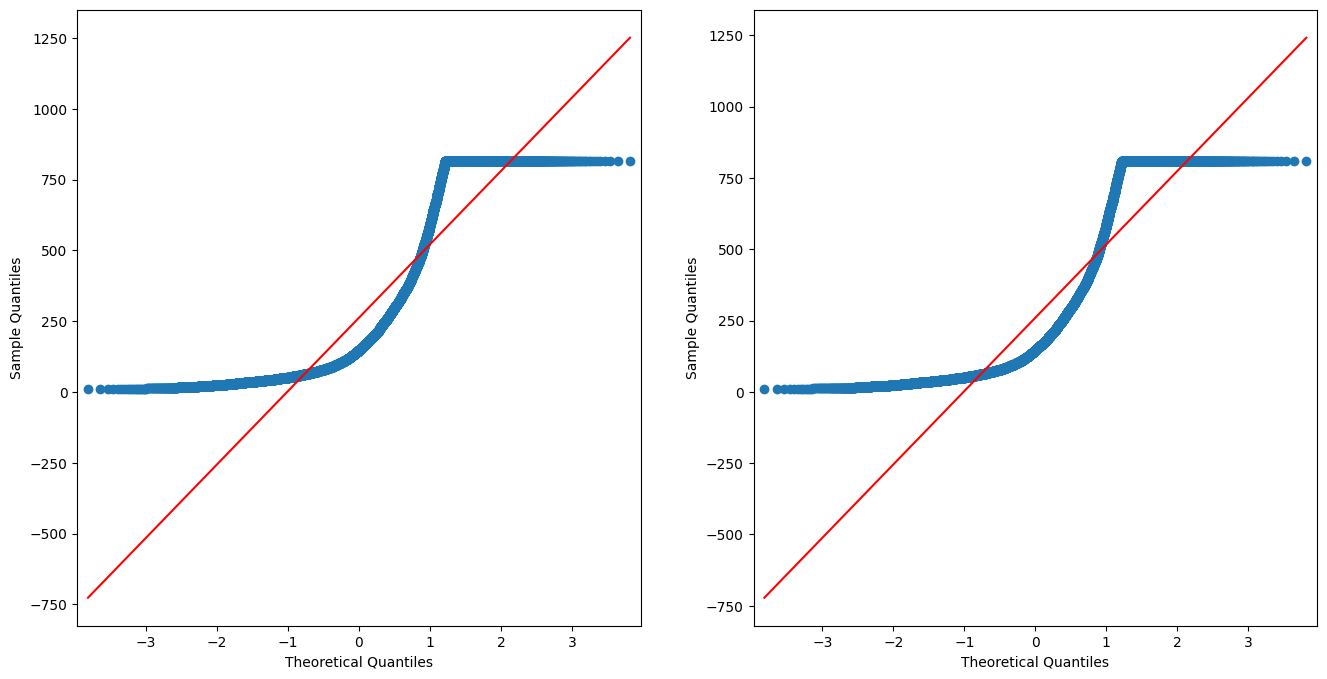

In [ ]:
#qqplots to check normality of data
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
qqplot(trip_aggregated_df['trip_actual_time_sum'],line='s',ax=axis[0])
qqplot(trip_aggregated_df['trip_segment_actual_time_sum'],line='s',ax=axis[1])
plt.show()

Data is not normally distributed

In [ ]:
ttest_rel(trip_aggregated_df['trip_actual_time_sum'],trip_aggregated_df['trip_segment_actual_time_sum'],alternative='greater')

TtestResult(statistic=122.11851987195247, pvalue=0.0, df=14786)

In [ ]:
stats.wilcoxon(trip_aggregated_df['trip_actual_time_sum'],trip_aggregated_df['trip_segment_actual_time_sum'],alternative='greater')

WilcoxonResult(statistic=64371531.0, pvalue=0.0)

In [ ]:
p_value=0.0
alpha=0.05

In [ ]:
if p_value>alpha:
  print('Null Hypothesis')
  print('Actual time aggregated value is lesser than segment actual time aggregated value')
else:
  print('Alternate Hypothesis')
  print('Actual time aggregated value is greater than segment actual time aggregated value')

Alternate Hypothesis
Actual time aggregated value is greater than segment actual time aggregated value


c. OSRM distance aggregated value and segment OSRM distance
aggregated value.

Null Hypothesis H0 : OSRM distance aggregated value is less than segment OSRM distance aggregated value.

Alternate Hypothesis H1 : OSRM distance aggregated value is greater than segment OSRM distance aggregated value.



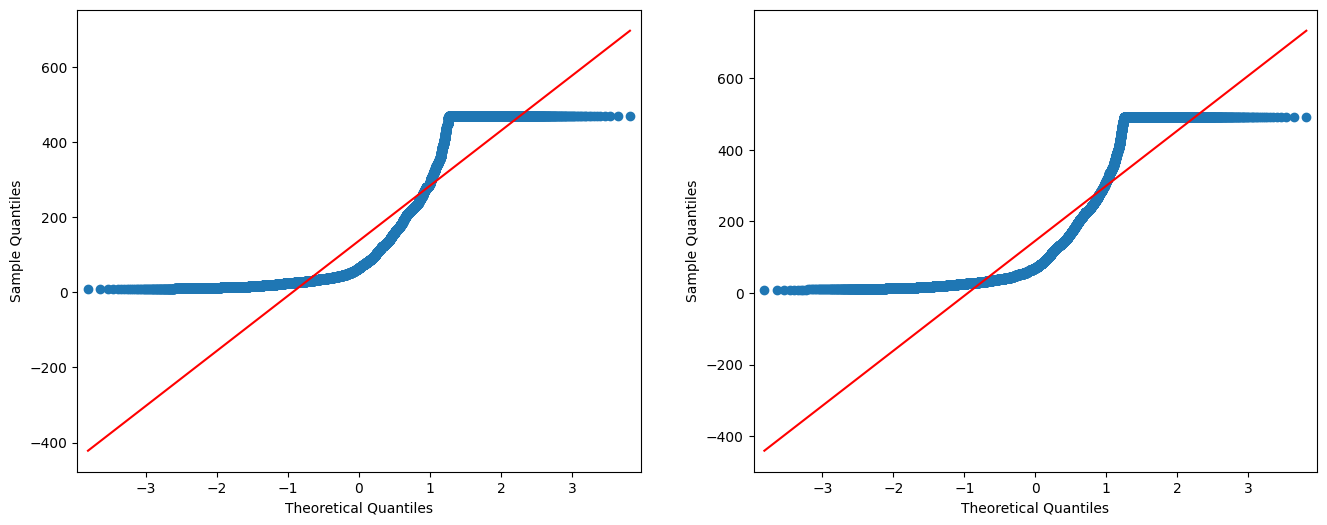

In [ ]:
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
qqplot(trip_aggregated_df['trip_osrm_distance_sum'],line='s',ax=axis[0])
qqplot(trip_aggregated_df['trip_segment_osrm_distance_sum'],line='s',ax=axis[1])
plt.show()

Data is not normally distributed

In [ ]:
ttest_rel(trip_aggregated_df['trip_osrm_distance_sum'],trip_aggregated_df['trip_segment_osrm_distance_sum'],alternative='greater')

TtestResult(statistic=-50.07621180430228, pvalue=1.0, df=14786)

In [ ]:
stats.wilcoxon(trip_aggregated_df['trip_osrm_distance_sum'],trip_aggregated_df['trip_segment_osrm_distance_sum'],alternative='greater')

WilcoxonResult(statistic=11212041.5, pvalue=1.0)

In [ ]:
p_value=1.0
alpha=0.05

In [ ]:
if p_value>alpha:
  print('Null Hypothesis')
  print('OSRM distance aggregated value is less than segment OSRM distance aggregated value')
else:
  print('Alternate Hypothesis')
  print('OSRM distance aggregated value is greater than segment OSRM distance aggregated value')

Null Hypothesis
OSRM distance aggregated value is less than segment OSRM distance aggregated value


d. OSRM time aggregated value and segment OSRM time aggregated
value.

Null Hypothesis H0 : OSRM time aggregated value is less than segment OSRM time aggregated value.

Alternate Hypothesis H1 : OSRM time aggregated value is greater than segment OSRM time aggregated value.

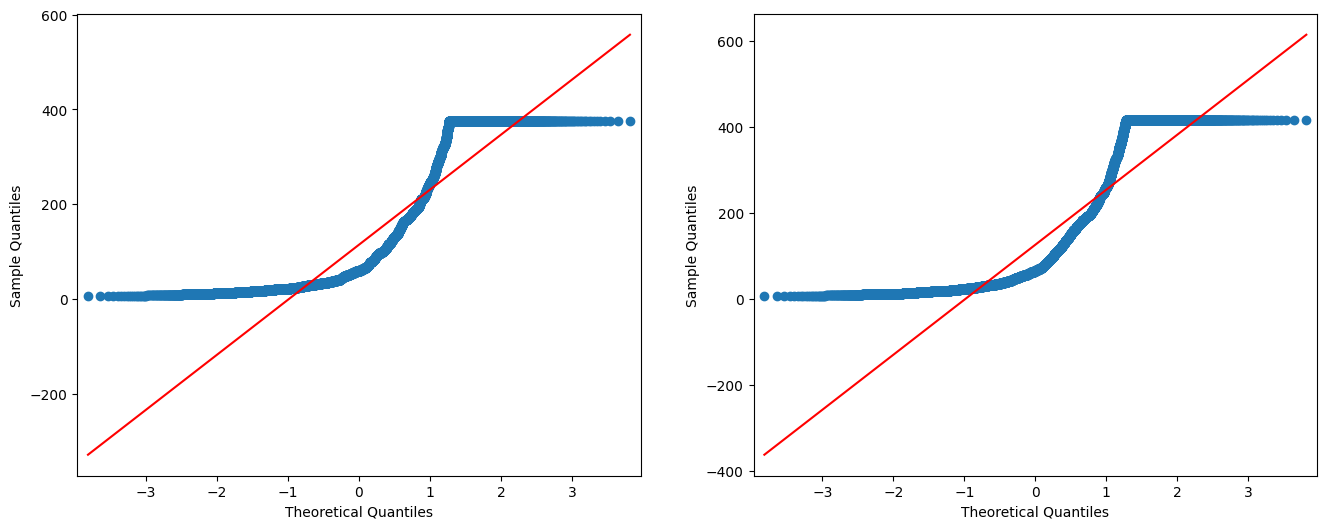

In [ ]:
figure,axis=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
qqplot(trip_aggregated_df['trip_osrm_time_sum'],line='s',ax=axis[0])
qqplot(trip_aggregated_df['trip_segment_osrm_time_sum'],line='s',ax=axis[1])
plt.show()

Data is not normally distributed

In [ ]:
ttest_rel(trip_aggregated_df['trip_osrm_time_sum'],trip_aggregated_df['trip_segment_osrm_time_sum'],alternative='greater')

TtestResult(statistic=-63.41875343116358, pvalue=1.0, df=14786)

In [ ]:
stats.wilcoxon(trip_aggregated_df['trip_osrm_time_sum'],trip_aggregated_df['trip_segment_actual_time_sum'],alternative='greater')

WilcoxonResult(statistic=106005.0, pvalue=1.0)

In [ ]:
p_value=1.0
alpha=0.05

In [ ]:
if p_value>alpha:
  print('Null Hypothesis')
  print('OSRM time aggregated value is less than segment OSRM time aggregated value.')
else:
  print('Alternate Hypothesis')
  print('OSRM time aggregated value is greater than segment OSRM time aggregated value.')

Null Hypothesis
OSRM time aggregated value is less than segment OSRM time aggregated value.


Business Insights & Recommendations

Check from where most orders are coming from (State, Corridor, etc.)

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,od_time_diff_hour,source_state,source_city,source_place,destination_state,destination_city,destination_place,Month,Year,Day
125002,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125003,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125004,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125005,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125006,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12


In [ ]:
t1=df.groupby('source_state').agg(trip_unique_orders=('trip_uuid','nunique')).sort_values(by='trip_unique_orders',ascending=False).reset_index()[:20]

In [ ]:
t1

,source_state,trip_unique_orders
0,Maharashtra,2748
1,Karnataka,2324
2,Haryana,1824
3,Tamil Nadu,1109
4,Uttar Pradesh,873
5,Telangana,825
6,Delhi,790
7,Gujarat,774
8,West Bengal,682
9,Punjab,643


By using Barplots

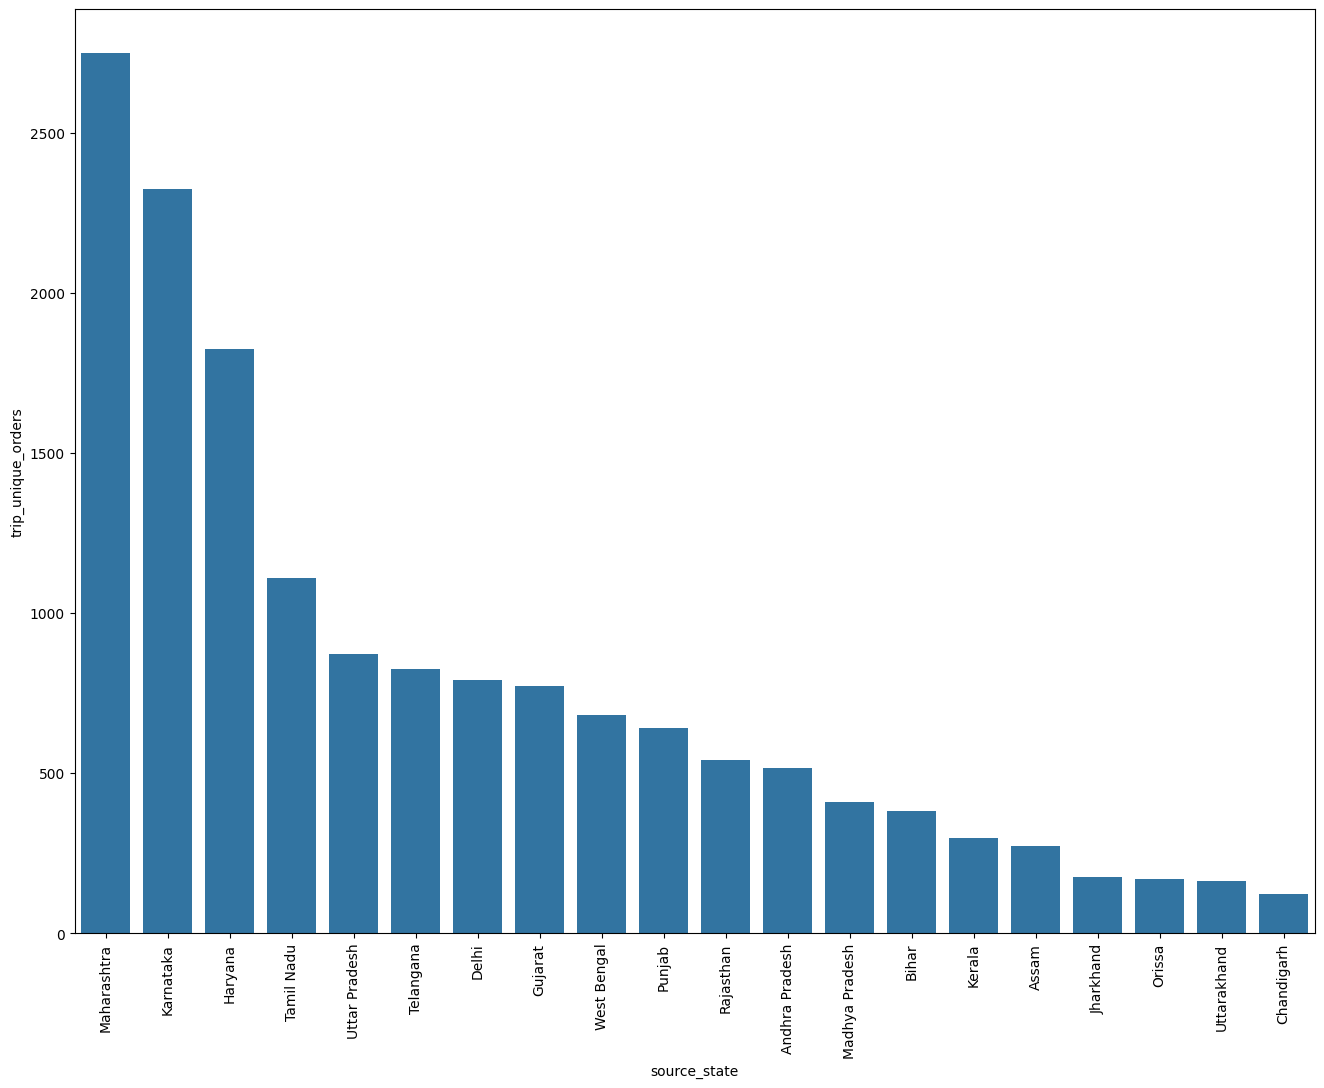

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(x=t1['source_state'],y=t1['trip_unique_orders'])
plt.xticks(rotation=90)
plt.show()

Busiest corridor, avg distance between them, avg time taken.

In [ ]:
df.head(4)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,od_time_diff_hour,source_state,source_city,source_place,destination_state,destination_city,destination_place,Month,Year,Day
125002,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125003,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125004,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12
125005,1,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,...,21.010074,Uttar Pradesh,Kanpur,Central_H_6,Haryana,Gurgaon,Bilaspur_HB,9,2018,12


In [ ]:
df['corridor']=df.apply(lambda x: "#".join([x['source_center'],x['destination_center']]),axis=1)

Busiest Corridor

In [ ]:
busy_corridor=df.groupby(['trip_uuid','corridor']).nth(-1).groupby('corridor').agg(total_trips=('trip_uuid','nunique')).sort_values(by='total_trips',ascending=False).reset_index()[:20]

In [ ]:
busy_corridor

,corridor,total_trips
0,IND562132AAA#IND560300AAA,151
1,IND562132AAA#IND560099AAB,127
2,IND560099AAB#IND560300AAA,121
3,IND560300AAA#IND562132AAA,108
4,IND411033AAA#IND421302AAG,107
5,IND421302AAG#IND400072AAB,105
6,IND560099AAB#IND562132AAA,102
7,IND000000ACT#IND000000ACB,100
8,IND400072AAD#IND421302AAG,99
9,IND000000ACB#IND131028AAB,92


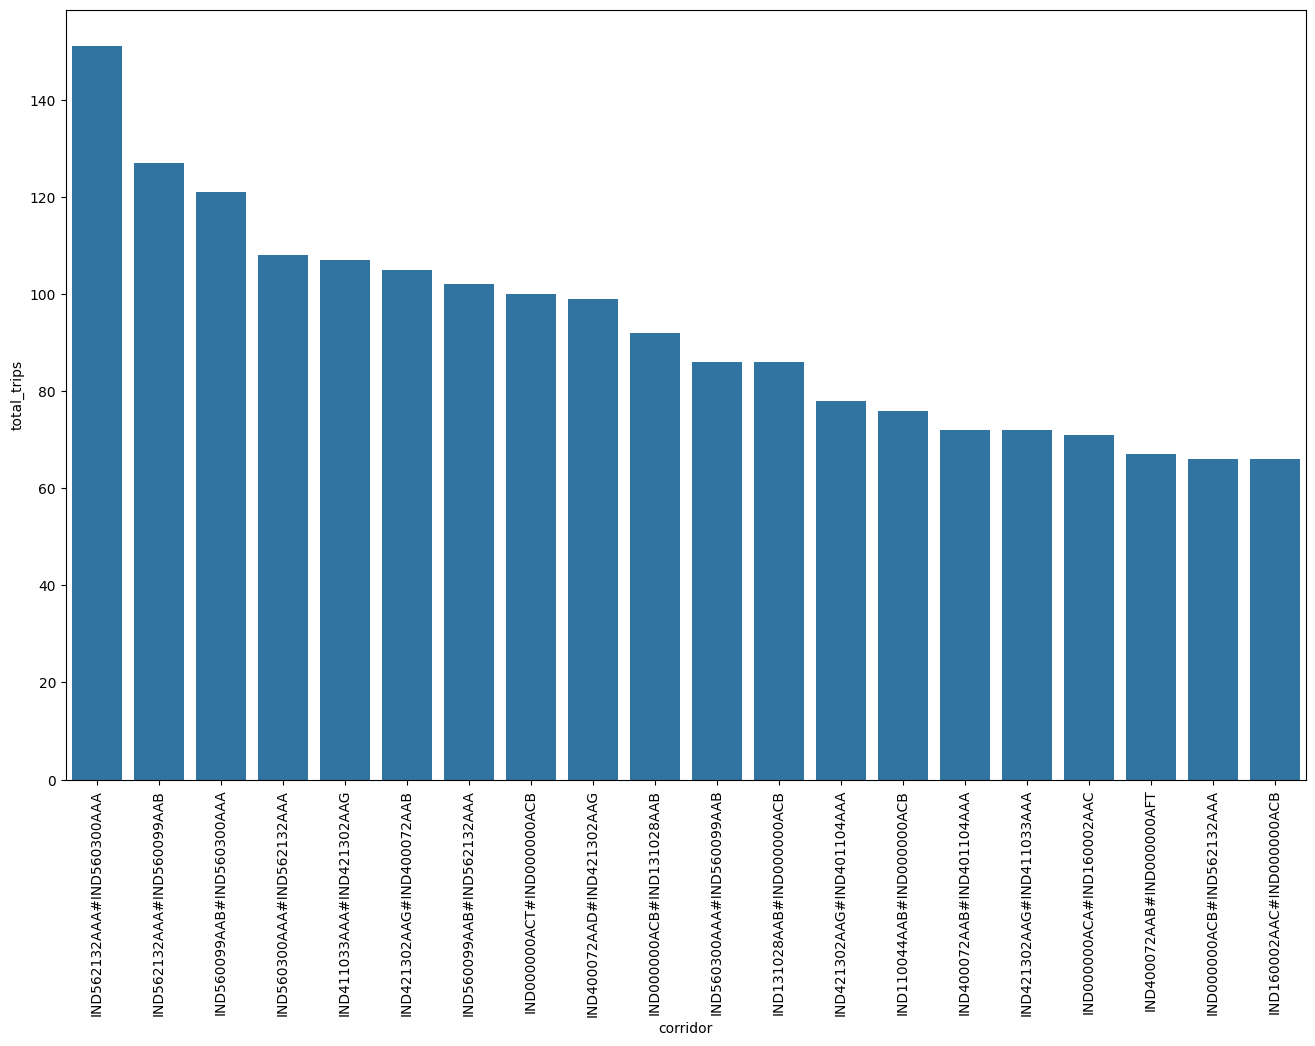

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x=busy_corridor['corridor'],y=busy_corridor['total_trips'])
plt.xticks(rotation=90)
plt.show()

Busiest corridor avg distance between them

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_cumsum', 'segment_osrm_time_cum',
       'segment_osrm_distance_cum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum',
       'od_time_diff_hour', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place', 'Month',
       'Year', 'Day', 'corridor'],
      dtype='object')

In [ ]:
corridor_distance=df.groupby(['trip_uuid','corridor']).nth(-1).groupby('corridor').agg(average_distance=('segment_osrm_distance_cum','mean')).reset_index()

In [ ]:
corridor_distance=corridor_distance.sort_values(by='average_distance',ascending=False)
corridor_distance

,corridor,average_distance
1148,IND421302AAG#IND712311AAA,2584.622933
349,IND160002AAC#IND562132AAA,2500.214500
2240,IND712311AAA#IND421302AAG,2363.329580
58,IND000000ACB#IND600056AAB,2361.555264
1721,IND562132AAA#IND000000ACB,2312.589602
...,...,...
917,IND388320AAA#IND388121AAA,10.257200
2406,IND751015AAA#IND751002AAB,10.197450
1934,IND600032AAB#IND600008AAC,10.047600
477,IND211010AAB#IND211002AAB,9.804300


In [ ]:
corridor_distance=corridor_distance[:20]

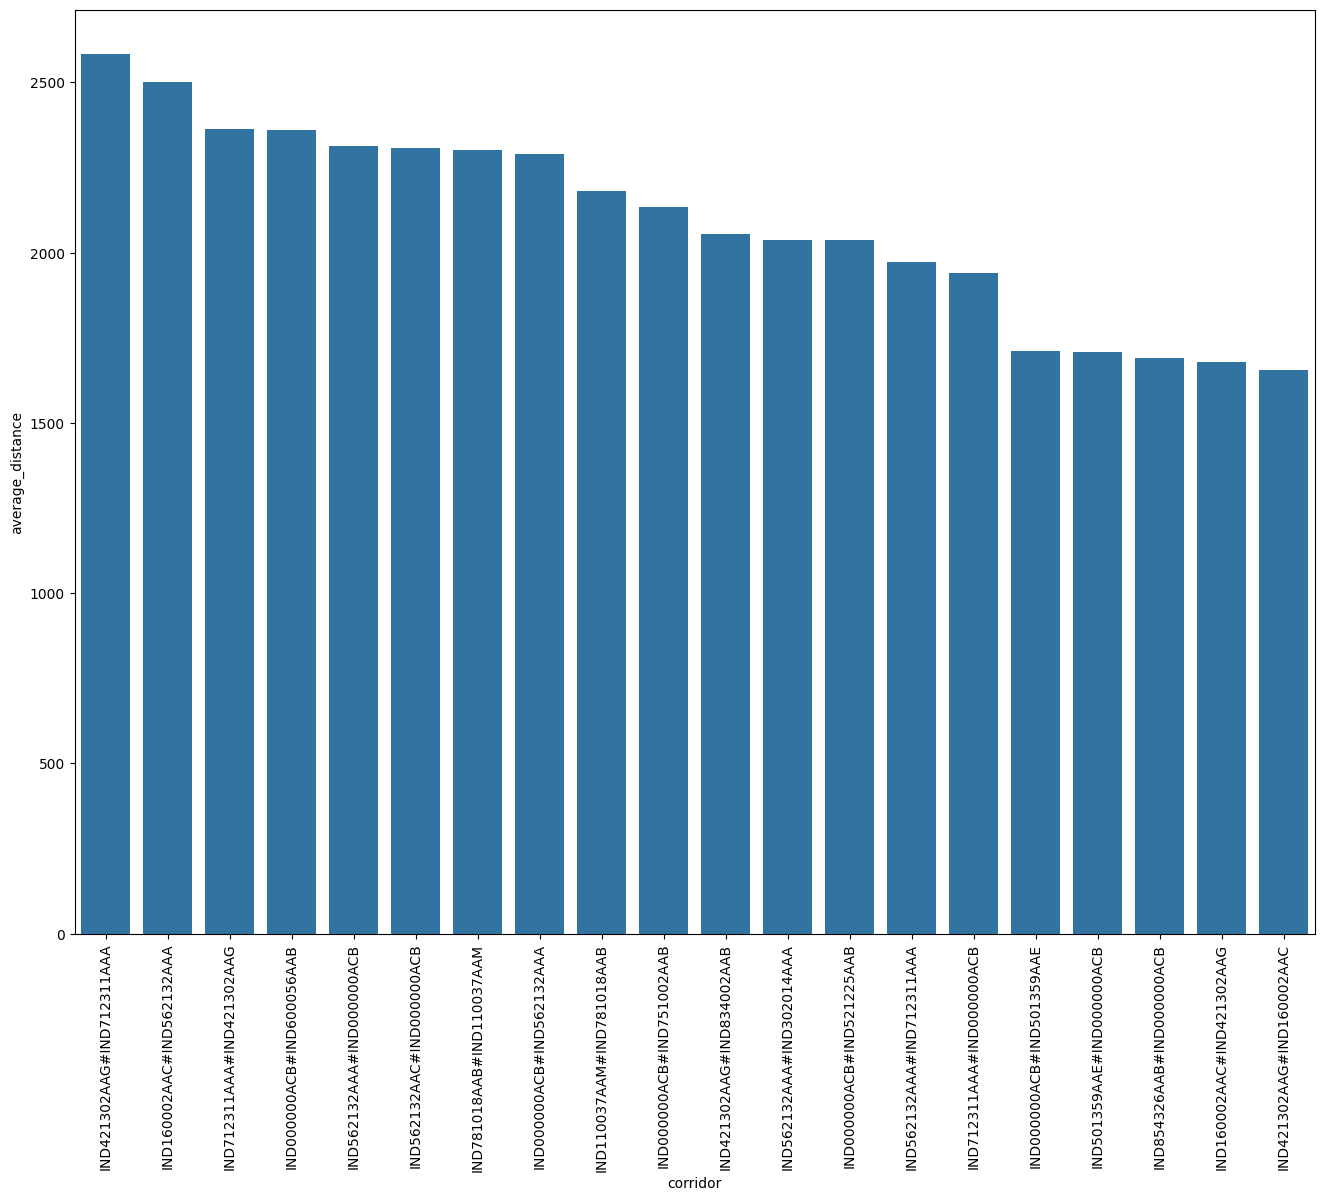

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(x=corridor_distance['corridor'],y=corridor_distance['average_distance'])
plt.xticks(rotation=90)
plt.show()

Busiest corridor avg time taken.

In [ ]:
corridor_time=df.groupby(['trip_uuid','corridor']).nth(-1).groupby('corridor').agg(avg_time=('segment_actual_time_cumsum','mean')).reset_index()

In [ ]:
corridor_time=corridor_time.sort_values(by='avg_time',ascending=False)[:20]

In [ ]:
corridor_time

,corridor,avg_time
349,IND160002AAC#IND562132AAA,3751.000000
2475,IND781018AAB#IND110037AAM,3341.764706
115,IND110037AAM#IND781018AAB,3281.000000
2240,IND712311AAA#IND421302AAG,3141.200000
58,IND000000ACB#IND600056AAB,3090.857143
1754,IND562132AAA#IND712311AAA,3010.333333
1148,IND421302AAG#IND712311AAA,2902.000000
348,IND160002AAC#IND421302AAG,2867.000000
57,IND000000ACB#IND562132AAA,2864.136364
1721,IND562132AAA#IND000000ACB,2766.454545


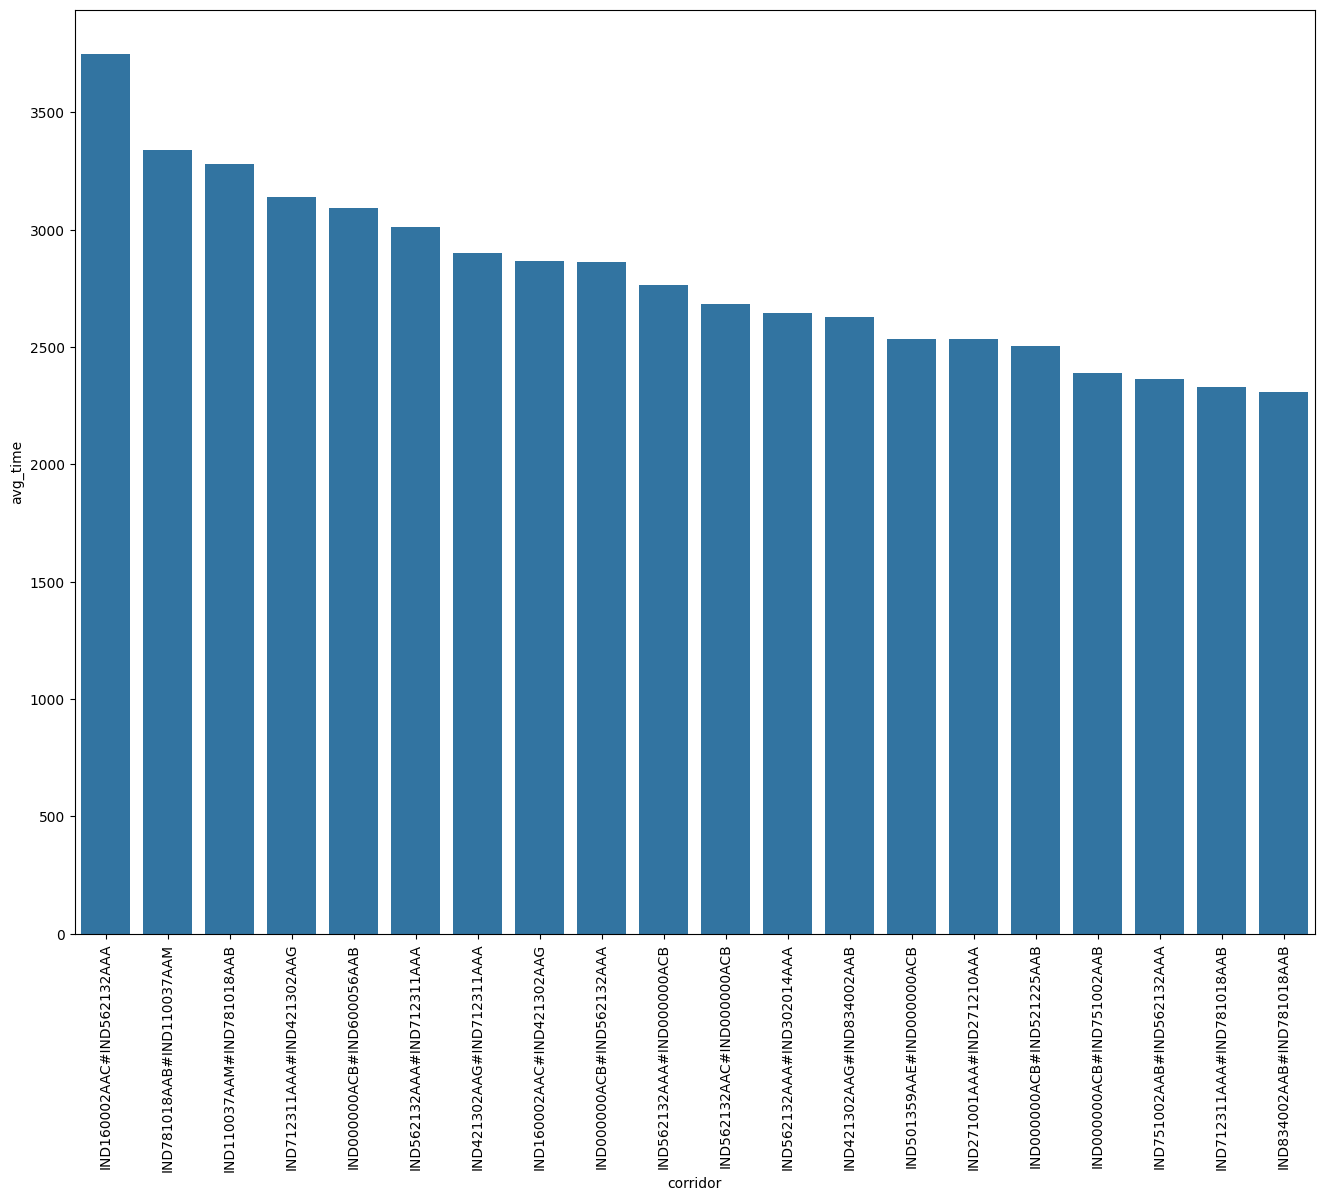

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(x=corridor_time['corridor'],y=corridor_time['avg_time'])
plt.xticks(rotation=90)
plt.show()